<a href="https://colab.research.google.com/github/kowoonho/machine-learning/blob/main/mnist_by_softmax_regression.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [24]:
import torch
import torchvision.datasets as dsets
import torchvision.transforms as transforms
from torch.utils.data import DataLoader
import torch.nn as nn
import matplotlib.pyplot as plt
import random

In [25]:
use_cuda = torch.cuda.is_available() #gpu를 쓰고있으면 true아니면 false를 출력함.

device = torch.device("cuda" if use_cuda else "cpu")
print("다음 기기로 학습합니다: ", device)

다음 기기로 학습합니다:  cuda


In [26]:
random.seed(1)
torch.manual_seed(1)
if device == 'cuda':
  torch.cuda.manual_seed_all(1) 

In [27]:
training_epochs = 15
batch_size = 100

In [28]:
mnist_train = dsets.MNIST(root="MNIST_data/", train = True,
                          transform = transforms.ToTensor(),
                          download=True)
# root -> 데이터를 다운로드받을 경로
# train -> 트레이닝데이터인지 테스트데이터인지
# transform -> 데이터를 파이토치 텐서로 변환
# download -> 다운로드 할 것인가?
mnist_test = dsets.MNIST(root = "MNIST_data/", train = False,
                         transform = transforms.ToTensor(),
                         download = True)


In [29]:
data_loader = DataLoader(dataset=mnist_train, batch_size=batch_size,
                         shuffle=True, drop_last=True)
# batch_size는 배치사이즈를 얼마로 쪼개서 학습할 것인지를 의미합니다.
# shuffle은 1 epoch마다 미니배치를 섞을 것인지의 여부입니다.
# drop_last는 마지막배치를 버릴것인지를 의미합니다.
# 예를들면, 1000개의 데이터에서 128개의 배치로 쪼개면 마지막 남은 104개를 버린다는 것을 의미합니다.


In [30]:
linear = nn.Linear(784, 10, bias = True).to(device)
# bias = True -> b를 사용할 것인지 여부 but, default값이 True입니다.
criterion = nn.CrossEntropyLoss().to(device) #내부에 소프트맥스 함수 포함
optimizer = torch.optim.SGD(linear.parameters(), lr = 0.1)

In [31]:
for epoch in range(training_epochs):
  avg_cost = 0
  total_batch = len(data_loader)
  for x, y in data_loader: 
    x = x.view(-1, 784).to(device)
    y = y.to(device)

    optimizer.zero_grad()
    hypothesis = linear(x)
    cost = criterion(hypothesis, y)
    cost.backward()
    optimizer.step()

    avg_cost += cost/total_batch

  print('Epoch:', '%04d' %(epoch + 1), 'cost = ', '{:.9f}'.format(
      avg_cost
  ))

print('Learning finished!')

Epoch: 0001 cost =  0.533756375
Epoch: 0002 cost =  0.359071344
Epoch: 0003 cost =  0.330853939
Epoch: 0004 cost =  0.316269368
Epoch: 0005 cost =  0.306897253
Epoch: 0006 cost =  0.299754918
Epoch: 0007 cost =  0.295043945
Epoch: 0008 cost =  0.290703595
Epoch: 0009 cost =  0.287395447
Epoch: 0010 cost =  0.284370959
Epoch: 0011 cost =  0.281917393
Epoch: 0012 cost =  0.279720336
Epoch: 0013 cost =  0.277781814
Epoch: 0014 cost =  0.275830269
Epoch: 0015 cost =  0.274402410
Learning finished!


Accuracy :  0.8837999701499939
Label :  4
Prediction :  4


/usr/local/lib/python3.7/dist-packages/torchvision/datasets/mnist.py:67: UserWarning: test_data has been renamed data
  warnings.warn("test_data has been renamed data")
/usr/local/lib/python3.7/dist-packages/torchvision/datasets/mnist.py:57: UserWarning: test_labels has been renamed targets
  warnings.warn("test_labels has been renamed targets")


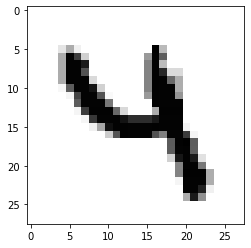

In [32]:
with torch.no_grad():
  x_test = mnist_test.test_data.view(-1,784).float().to(device)
  y_test = mnist_test.test_labels.to(device)

  prediction = linear(x_test)
  correct_prediction = torch.argmax(prediction, 1) == y_test
  accuracy = correct_prediction.float().mean()
  print('Accuracy : ', accuracy.item())

  r = random.randint(0, len(mnist_test) - 1)
  x_single_data = mnist_test.test_data[r:r+1].view(-1,784).float().to(device)
  y_single_data = mnist_test.test_labels[r:r+1].to(device)

  single_prediction = linear(x_single_data)

  print('Label : ',y_single_data.item())
  print('Prediction : ',torch.argmax(single_prediction, 1).item())

  plt.imshow(mnist_test.test_data[r:r+1].view(28,28), cmap = 'Greys',
             interpolation='nearest')
  
  plt.show()

In [33]:
## "pytorch로 시작하는 딥러닝 입문"을 참고하여 쓴 코드입니다.
## https://wikidocs.net/60324